In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Output/NEES_summary_with_heliquest.csv')

In [3]:
df.columns

Index(['AA_seq', 'AH', 'Median', 'Mean', 'Organelle', 'NEES_binned', 'phil_A',
       'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L',
       'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M',
       'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S',
       'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N',
       'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E',
       'phil_H', 'phob_H', 'phil_P', 'phob_P', 'Length', 'Hydrophobicity',
       'H_moment', 'Netcharge', 'Dfactor', 'phil_S_T', 'phil_R_K', 'phil_L_I',
       'phil_F_W', 'phil_M_C', 'phil_D_E', 'phil_N_Q', 'phob_S_T', 'phob_R_K',
       'phob_L_I', 'phob_F_W', 'phob_M_C', 'phob_D_E', 'phob_N_Q'],
      dtype='object')

In [4]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# List of the columns we are interested in
columns_of_interest = ['phil_S', 'phil_T', 'phil_K', 'phil_R']

# Define the specific order for the NEES_binned categories
order = ['No Binding', 'Subtle Binding', 'Strong Binding']

In [5]:
# A bespoke funtion for plotting
def myplot(df, x, y):
    # Create a box plot for the new column 'phob_V' by 'NEES_binned'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=df, order=order, palette="Blues")
    # Add scatter points jittered for better visualization
    sns.stripplot(x=x, y=y, data=df, order=order, color='black', jitter=True, alpha=0.5)

    plt.title(f'{x} by {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

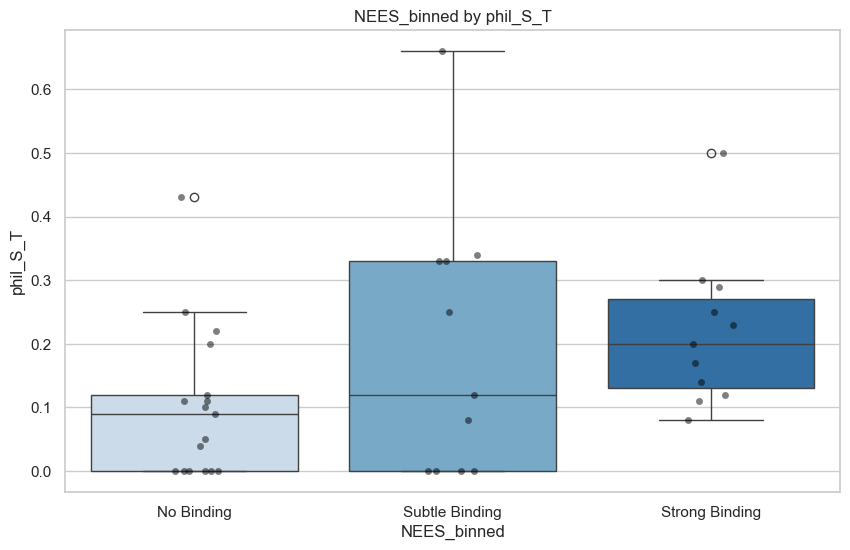

In [6]:
myplot(df=df, x='NEES_binned', y='phil_S_T')

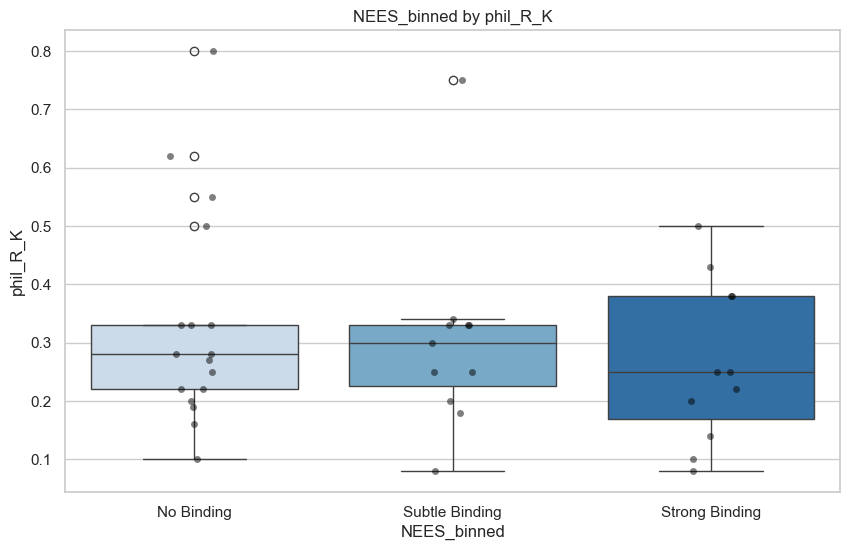

In [7]:
myplot(df=df, x='NEES_binned', y='phil_R_K')

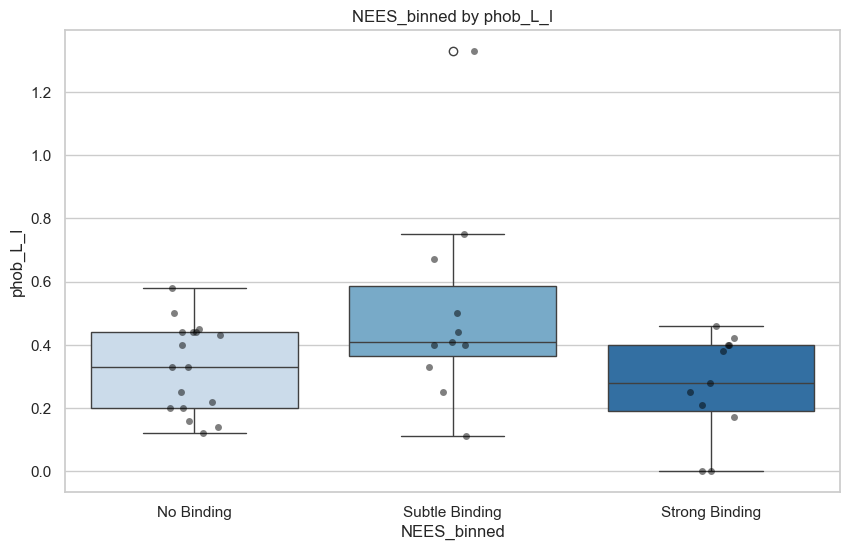

In [14]:
myplot(df=df, x='NEES_binned', y='phob_L_I')

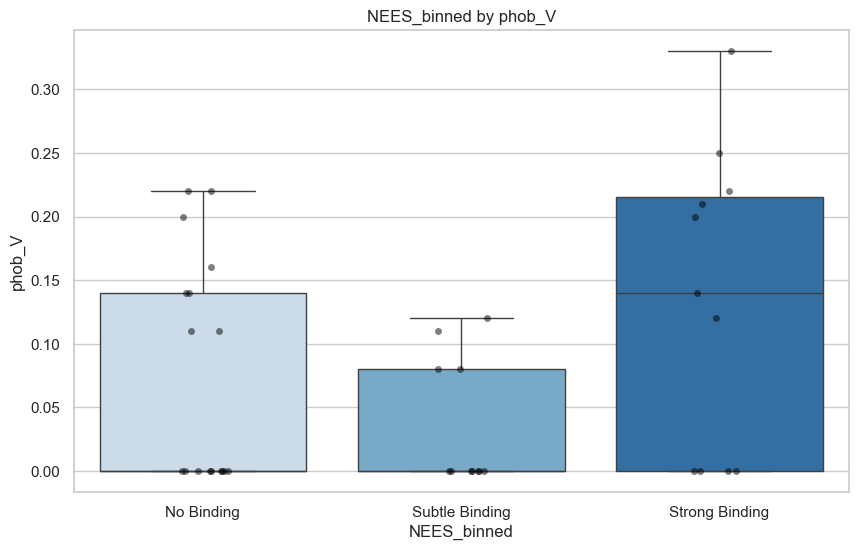

In [9]:
myplot(df=df, x='NEES_binned', y='phob_V')

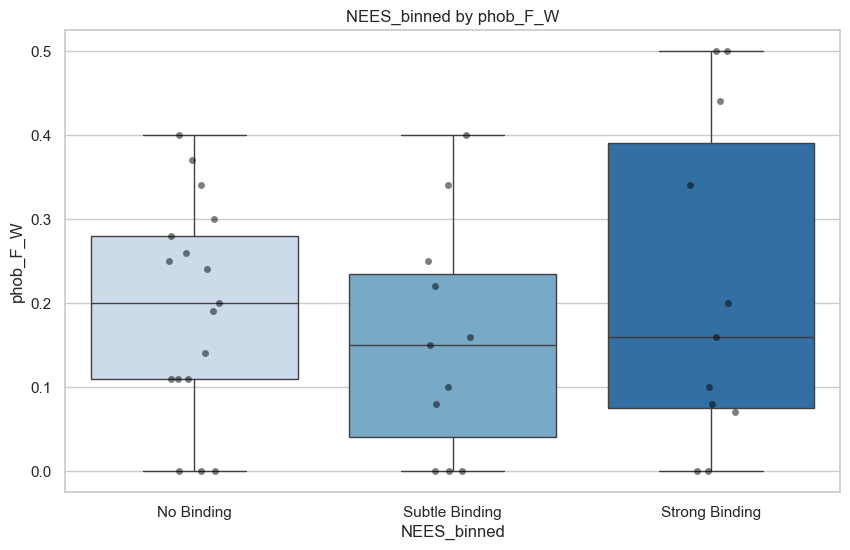

In [11]:
myplot(df=df, x='NEES_binned', y='phob_F_W')

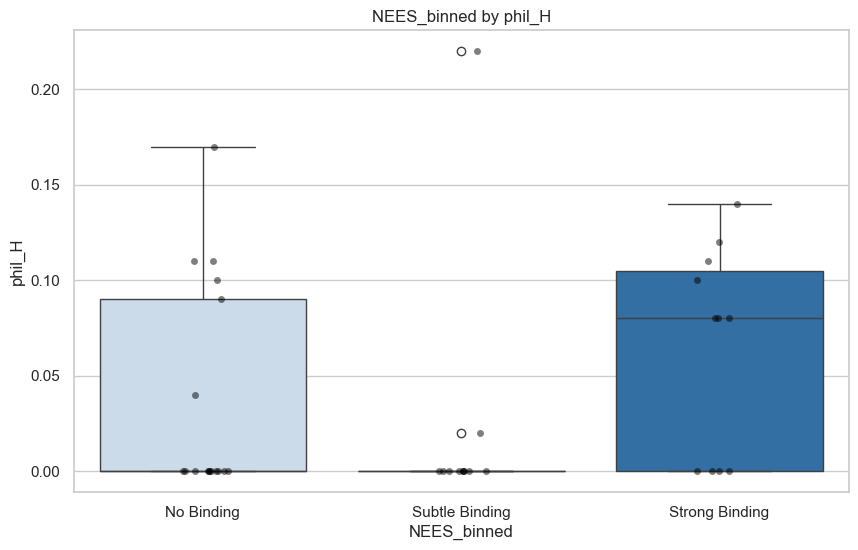

In [39]:
myplot(df=df, x='NEES_binned', y='phil_H')

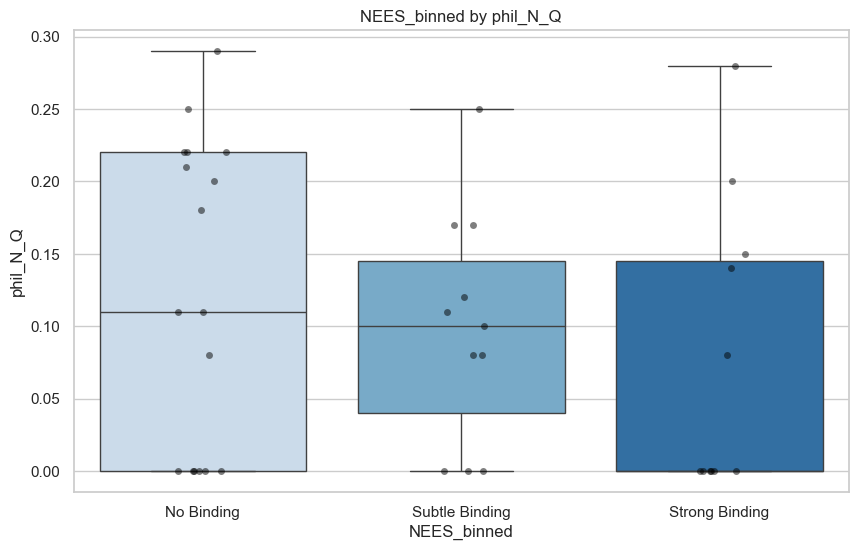

In [40]:
myplot(df=df, x='NEES_binned', y='phil_N_Q')

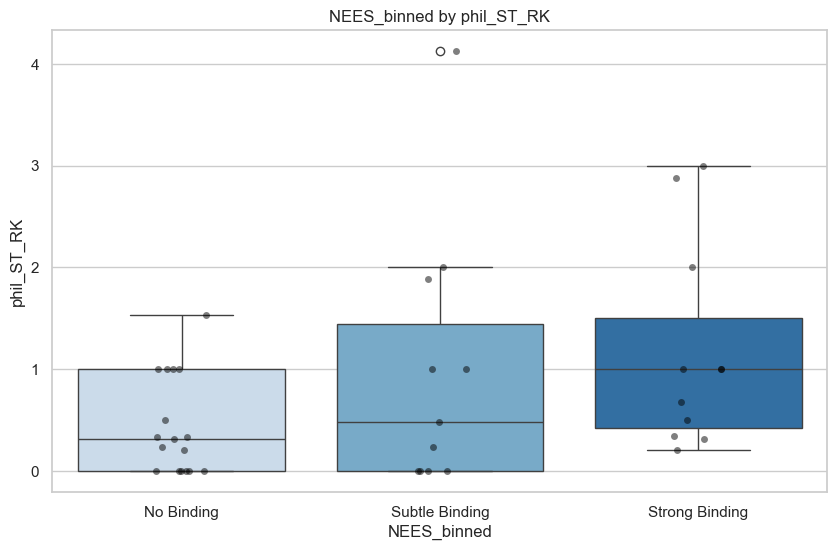

In [35]:
# create ST:RK ratio and round it to 2 decimail points
df['phil_ST_RK'] = (df['phil_S_T'] / df['phil_R_K']).round(3)
myplot(df=df, x='NEES_binned', y='phil_ST_RK')

In [36]:
# Identifying outliers whose ST:RK is stronger than any of No Binding AHs but whose INM binding is still subtle
df_copy = df[(df['phil_ST_RK'] > 1.5) & (df['NEES_binned'] == "Subtle Binding")]
df_copy[['AH', 'Median', 'phil_ST_RK']].sort_values(['Median'], ascending=False)

,AH,Median,phil_ST_RK
24,vma21,0.640,2.000
33,arfgap1,0.597,1.889
34,nup133,0.597,4.125


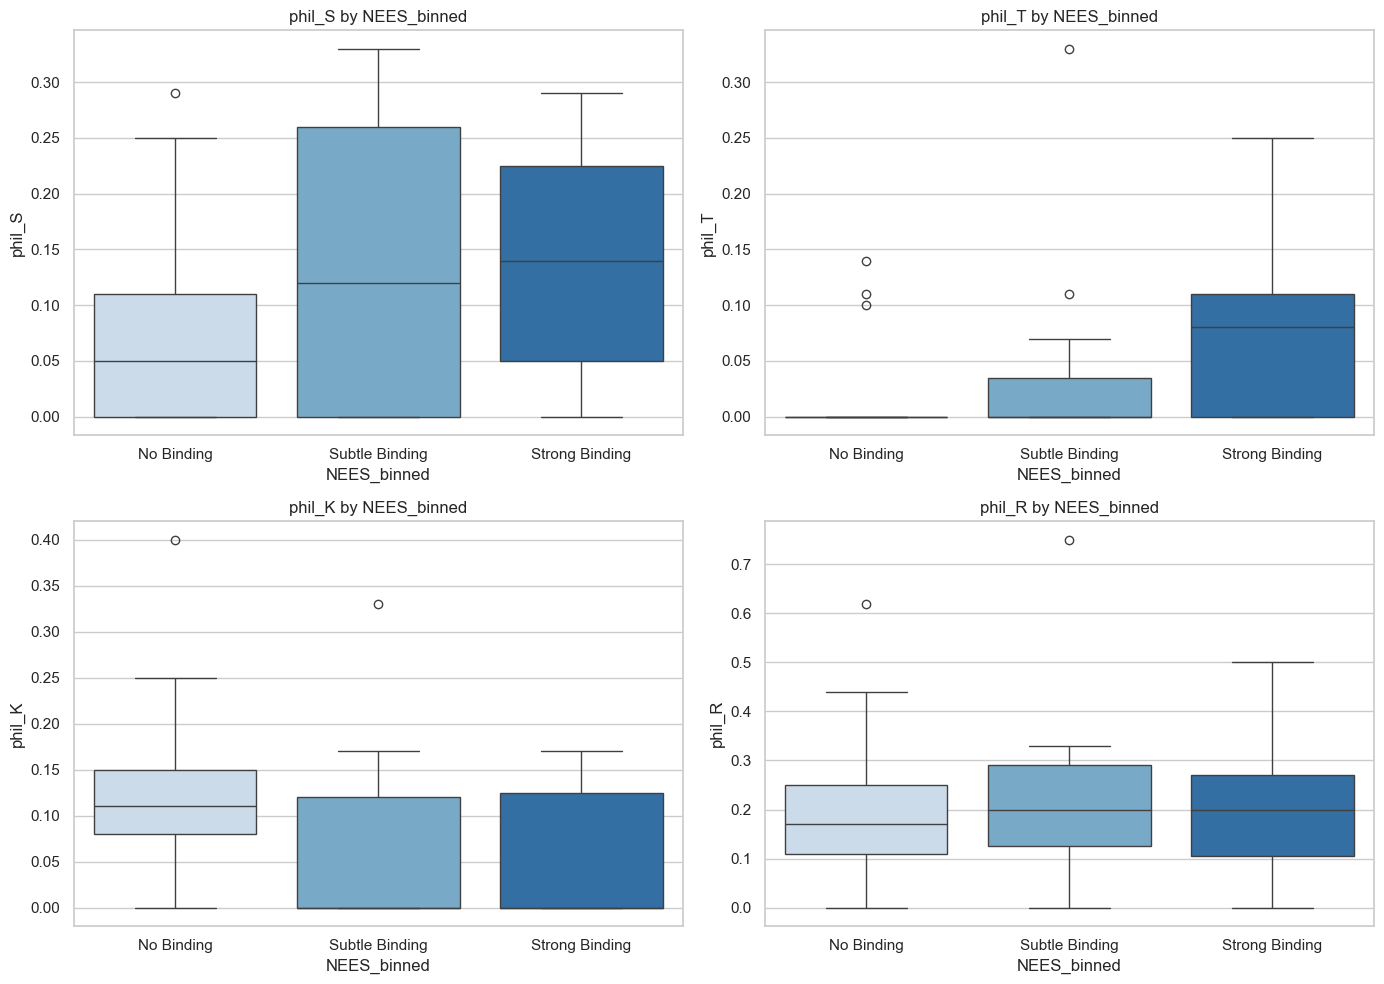

In [37]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, col in enumerate(columns_of_interest):
    # Determine the row and column index for the current subplot
    row = idx // 2
    col_idx = idx % 2
    
    # Create a boxplot with the specified order
    sns.boxplot(x='NEES_binned', y=col, data=df, ax=axes[row, col_idx], order=order, palette="Blues")
    axes[row, col_idx].set_title(f'{col} by NEES_binned')
    axes[row, col_idx].set_xlabel('NEES_binned')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()